# Getting Started with Pyhon

* At this point, you should have followed the instructions to either install Python and Jupyter locally on your computer or get setup with Google Colab.

* This is an example of a Jupyter notebook. Each block is called a cell. Each cell can either have text (called markdown) or Python code.

* This assignment walks you through some basic data analysis to help you get familiar with the tools you'll be using in this class.

### The Data

There is a data file, plain text file, that you'll have to open using Python and generate a plot. The data is from the Automatic Weather Station at Dome C in Antarctica for the month of January, 2024. The [README.txt](https://raw.githubusercontent.com/radryan1979/clim341/refs/heads/main/Data/README.txt) file in the folder gives the column names.

---

# Step 1

* The first step is to look at the README.txt file. A lot of data archives will provide a separate resource that explaints the layout and metadata of text based data. Text based data often comes formatted as either comma separated values or tab delimited. In a comma separated file, a comma is used as a delimiter between the values like below:
23.25,1,4,5
and in a tab separated file, there are spaces or tabs delimiting the values in a row
23.25    1   4    5

* Next, since the file is a text file, we can open it in a text editor to see what the first few lines look like. We can check to see if the column names are present or how many lines of metadata there are before the actually data starts. This will help us when we want to process the data later.
  
    Year: 2024  Month: 01  ID: DC2  ARGOS:  8989  Name: Dome C II           
    Lat: 75.11S  Lon: 123.35E  Elev: 3250m
    2024   1  1  1 0000  -29.8  639.9    4.5  174.0  444.0  444.0
    2024   1  1  1 0010  -29.2  639.8    3.0  179.0  444.0  444.0
    2024   1  1  1 0020  -29.0  639.8    4.0  180.0  444.0  444.0


We can see that the text file has two lines of metadata, and no column names. This means we'll have give each column a name when we load it.

---

# Step 2

Now that we know what our data file looks like, and what information is in it. we can open it and do some exploratory analysis.

We're going to use the Pandas package for Python to open this file. Pandas allows us to open column and row data into a dataset, then perform analysis on it. It's a really handy package to know.

In [1]:
# First we import the Pandas package

import pandas as pd

In [2]:
# Now, we can use pandas to open the file from a web location

# This is the location of the datafile on Ryan's GitHub
url = "https://raw.githubusercontent.com/radryan1979/clim341/refs/heads/main/Data/dome_c_data_jan_2024.txt"



* We're going to use the Pandas read_csv function to open the file. We have to give the function some details on how to topen the file. We saw that our file was space delimited, not comma separated values (csv), and that there are no column headers and two lines of metadata.

* We'll open the file and assign it to a variable named `df` which is just short for dataframe. We'll also create a list of column headers and tell Pandas to use those when opening the file.

In [5]:
# create our list of column headers from the README

cols = [
    "Year",
    "Julian day",
    "Month",
    "Day",
    "Observation time (UTC) HHMM",
    "Temperature (C)",
    "Pressure (hPa)",
    "Wind Speed (m/s)",
    "Wind Direction (deg)",
    "Relative Humidity (%)",
    "Delta-T (C)",
]

In [ ]:
df = pd.read_csv(
    url, # the file name or location
    sep=r"\s+", # tells pandas that spaces are the delimiters
    skiprows=2, # skip the first two rows of metadata
    on_bad_lines="skip", # if a line is bad, skip over it
    header=None, # there are no header columns
    names=cols # use this list of column names
)

In [8]:
# Now that this is loaded, you can print the first few rows of the dataframe to make
# sure everything looks right

df.head(5)

,Year,Julian day,Month,Day,Observation time (UTC) HHMM,Temperature (C),Pressure (hPa),Wind Speed (m/s),Wind Direction (deg),Relative Humidity (%),Delta-T (C)
0,2024,1,1,1,0,-29.8,639.9,4.5,174.0,444.0,444.0
1,2024,1,1,1,10,-29.2,639.8,3.0,179.0,444.0,444.0
2,2024,1,1,1,20,-29.0,639.8,4.0,180.0,444.0,444.0
3,2024,1,1,1,30,-28.2,639.8,4.2,188.0,444.0,444.0
4,2024,1,1,1,40,-28.4,639.8,4.8,177.0,444.0,444.0


In [15]:
# we can also look at the last few rows
df.tail(5)

,Year,Julian day,Month,Day,Observation time (UTC) HHMM,Temperature (C),Pressure (hPa),Wind Speed (m/s),Wind Direction (deg),Relative Humidity (%),Delta-T (C)
4459,2024,31,1,31,2310,-34.4,649.5,3.2,208.0,444.0,444.0
4460,2024,31,1,31,2320,-34.0,649.4,3.5,214.0,444.0,444.0
4461,2024,31,1,31,2330,-33.6,649.3,4.0,212.0,444.0,444.0
4462,2024,31,1,31,2340,-33.4,649.3,4.8,218.0,444.0,444.0
4463,2024,31,1,31,2350,-33.2,649.2,3.5,214.0,444.0,444.0


---

# Step 3

Now that we have our data loaded, we might want to get a basic understanding of the data. We can use some of the Pandas functions to look at different properties of the data. 

In [ ]:
# Look at maximum and minimum values for Temperature

print(f"Min temp: { df['Temperature (C)'].min() }")

print(f"Max temp: { df['Temperature (C)'].max() }")

Min temp: -42.1
Max temp: 444.0


* We use a print statement and use `{}` to put a variable we want to print out. Here the variabe is the dataframe `df` and then we specify a column name `['Temperature (C)']`. After that, we can use some of the built in functions of dataframes like `.min()` and `.max()`.

* We also see that the max value is 444.0, and that the last two columns seem to have 444.0 values. Looks like this might be a placeholder number for missing values. We'll want to address that so our data is clean and accurate. Let's find out how many missing values are in the Temperature column.

In [14]:
count_444 = (df["Temperature (C)"] == 444.0).sum()

print(f"There are {count_444} rows with missing values.")

There are 1802 rows with missing values.


* We can do a quick plot to see how these values might affect our data analysis.

<Axes: >

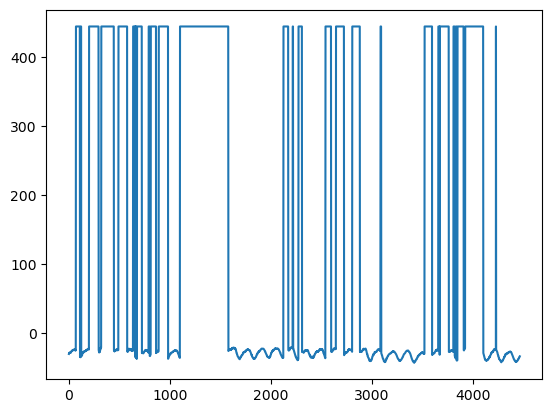

In [17]:
# pandas dataframes have a built in plotting fuction
df["Temperature (C)"].plot()

---

# Step 4

* Those values are going to be a problem. Let's swap those out with a different place holder called a NaN which stands for Not a Number. Then we can do some further analysis and anything with NaN will be ignored.

The max temp value is: -20.2


<Axes: >

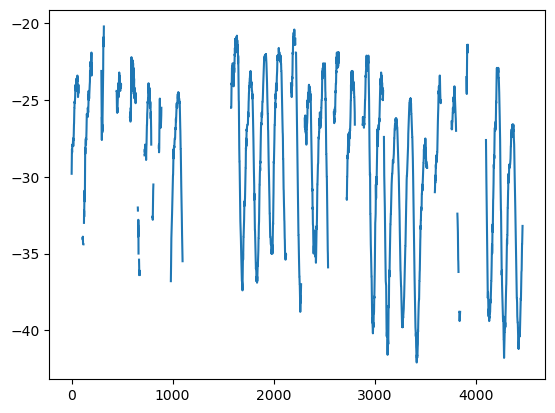

In [19]:
# first we import Numpy to use the NaN placeholder
import numpy as np

# now, we can replace all values of 444.0 with an np.nan
df["Temperature (C)"] = df["Temperature (C)"].replace(444.0, np.nan)

# then check what the max value for all of the temps is again
print(f"The max temp value is: {df['Temperature (C)'].max()}")

# and do a quick plot again
df["Temperature (C)"].plot()

* That's much better. Now we have real data, though it has gaps, which often happens with field collected data.

# Step 5

Now that there are no 444.0 values, we can generate some descriptive stats to see what our data looks like. The pandas calculations will ignore the NaN and just use the data that's there.

In [20]:
df["Temperature (C)"].describe()

count    2662.000000
mean      -28.978850
std         5.343812
min       -42.100000
25%       -33.100000
50%       -27.500000
75%       -24.600000
max       -20.200000
Name: Temperature (C), dtype: float64

The `.describe()` is a handy way to get some insight into your data. 

1. Count - the number of data points
2. Mean - the average of the data points
3. Std - the standard deviation -  the bigger this number is, the more the data is spread out.
4. Min - the minimum or smallest value in the data
5. 25% - first quartile - 25% of the data are below this value
6. 50% - median - middle value - half of the data are below this value and half are above it
7. 75% - third quartile - 75% of the data are below this value, the top 25% are above this value
8. max - the maximum or largest value in the data

---

* Let's do a histogram plot with a dataframe which helps to show the data distribution.

<Axes: >

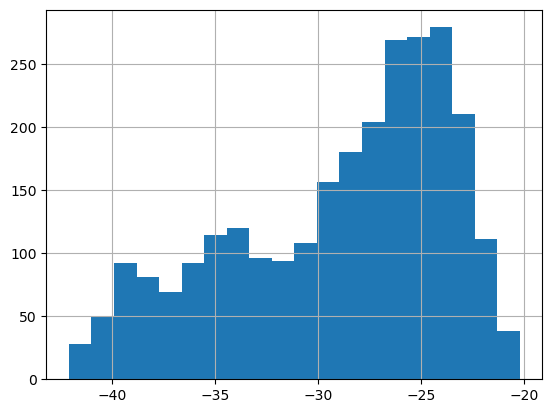

In [25]:
# simple histogram plot
df["Temperature (C)"].hist(bins=20)

# Your Turn

Now you can repeat the steps above and explore some of the other columns of data. Just copy and past the code starting at Step 3, then change the column names and see what you come up with.

In [26]:
# Look at maximum and minimum values for Pressure

print(f"Min pressure: { df['Pressure (hPa)'].min() }")

print(f"Max pressure: { df['Pressure (hPa)'].max() }")

Min pressure: 444.0
Max pressure: 661.5


In [27]:
# looks like 444.0 shows up, so you'll want to replace that with a NaN...